In [1]:
# import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
import os

In [37]:
os.listdir('../')

['jupyter_notebook',
 'reports',
 '.git',
 'data',
 'images',
 'README.md',
 'models',
 'scripts']

In [8]:
raw_df = pd.read_csv('../data/day.csv')

In [ ]:
# Summarization of your Data

In [9]:
raw_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# EDA --> Descriptive and Diagnostic Analysis

In [ ]:
# Descriptive Statistics

# create charts and plots
# univariate --> analysis on one variable
# bi-variate --> analysis with two or more varriable

/home/ved/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


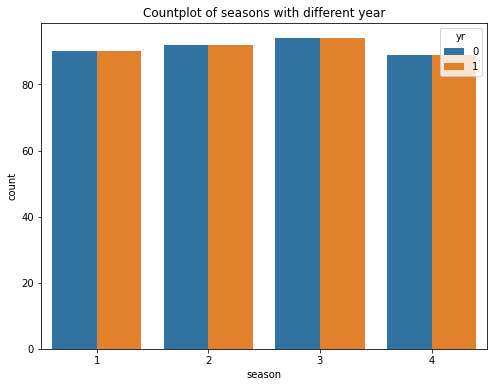

In [14]:
plt.figure(figsize=(8,6))
sns.countplot('season',data=raw_df,hue='yr')
plt.title("Countplot of seasons with different year")
plt.savefig('../images/countplot_seasons_years.jpg')

### Inferences

*  There are most no. of observations for 3rd season.

In [ ]:
# Decide on some questions that you want to explore and accordingly do the the analysis

In [16]:
# What kind of season has most demand of bikes.
raw_df.groupby(["season","yr"])["cnt"].mean()

season  yr
1       0     1666.666667
        1     3550.155556
2       0     3775.173913
        1     6209.489130
3       0     4464.361702
        1     6824.244681
4       0     3664.460674
        1     5791.865169
Name: cnt, dtype: float64

## Data Cleaning or Data Preparation part 
 * Data Consistency
 * Handling Missing Values
 * Outlier Analysis /Treating outlier values
 * Scaling of data
 * Feature Engineering
 
 

In [17]:
df = raw_df.copy(deep=True)

In [18]:
df = df.drop_duplicates()

In [19]:
df.dropna(inplace=True)

In [20]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
## Feature Selection

In [21]:
predictor_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered']
target_columns = ['cnt']

In [22]:
X = df[predictor_columns]
y = df[target_columns]


In [ ]:
# Spliting Data Sets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 13), (146, 13), (584, 1), (146, 1))

In [25]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [27]:
model = reg.fit(X_train,y_train)

In [28]:
model.coef_

array([[ 2.41550601e-13, -6.55673237e-13,  7.24549497e-14,
         3.94914257e-13, -7.62456976e-15, -6.38690593e-13,
         4.54566396e-13, -3.32457435e-14,  2.95269506e-14,
        -5.24283793e-15,  7.50014075e-15,  1.00000000e+00,
         1.00000000e+00]])

In [29]:
model.intercept_

array([9.09494702e-13])

In [31]:
y_train_pred = model.predict(X_train)

In [32]:
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluate your model

* import necessary metrics
mae,mse,rmse,r2_score.

In [34]:
import joblib

In [38]:
joblib.dump(model,"../models/bike-sharing-model.joblib")

['../models/bike-sharing-model.joblib']